In [1]:
#trying to read them in again

import geopandas as gpd


In [2]:
iso_30_2015 = gpd.read_file('isochrones/DGUID_ISO_30min_2015.shp')
iso_30_2025 = gpd.read_file('isochrones/DGUID_ISO_30min_2025.shp')


<Axes: >

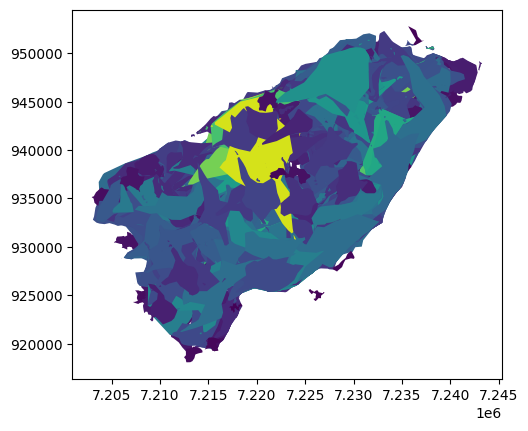

In [3]:
iso_30_2015.plot(column = 'area_perce')

<Axes: >

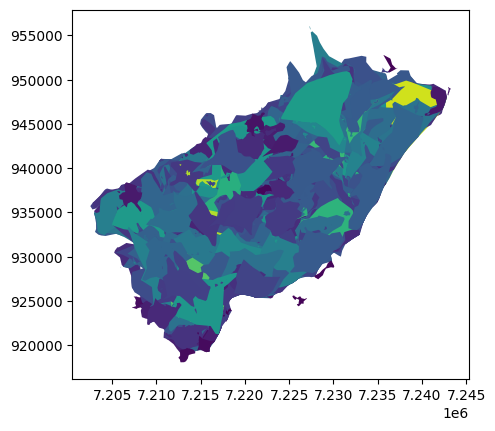

In [4]:
iso_30_2025.plot(column = 'area_perce')



Index(['ESRI_OID', 'Location', 'Percentage', 'DGUID', 'geometry'], dtype='object')


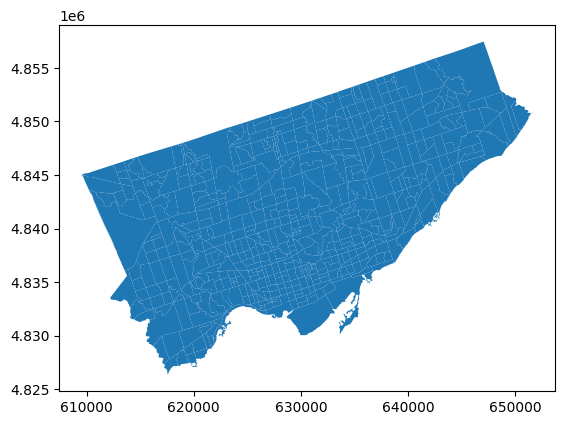

In [5]:
toronto_ct = gpd.read_file('correct_toronto_ct.shp')
toronto_ct.plot()
print(toronto_ct.columns)

In [6]:
study_area = toronto_ct.union_all().area

iso_30_2015['30_2015'] = iso_30_2015.geometry.area * 100 / study_area
iso_30_2025['30_2025'] = iso_30_2025.geometry.area * 100 / study_area


In [7]:
iso_30_2015_df = iso_30_2015[['DGUID', '30_2015']]
iso_30_2025_df = iso_30_2025[['DGUID', '30_2025']]

In [8]:
toronto_ct = toronto_ct.merge(iso_30_2015_df, on = 'DGUID', how = 'right')
toronto_ct = toronto_ct.merge(iso_30_2025_df, how = 'right', on = 'DGUID')

<Axes: >

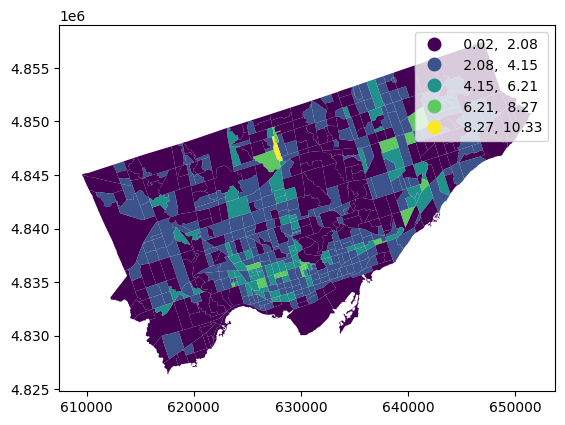

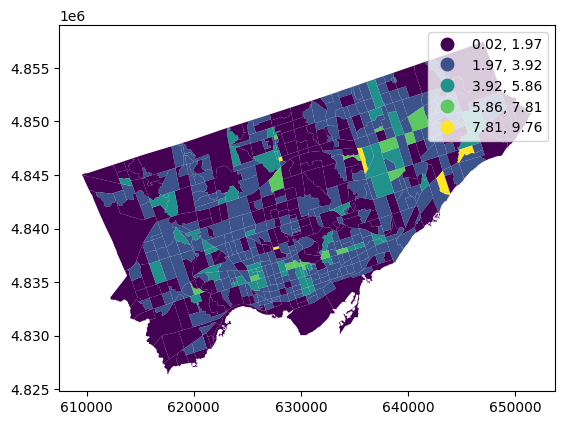

In [9]:
toronto_ct.plot(column = '30_2015', scheme = 'equal_interval', legend = True)
toronto_ct.plot(column = '30_2025', scheme = 'equal_interval', legend = True)

In [10]:
toronto_ct['change'] = toronto_ct['30_2025'] - toronto_ct['30_2015']

In [11]:
subway_2025 = gpd.read_file('./oct_2025_subway/subway.shp')


<Axes: >

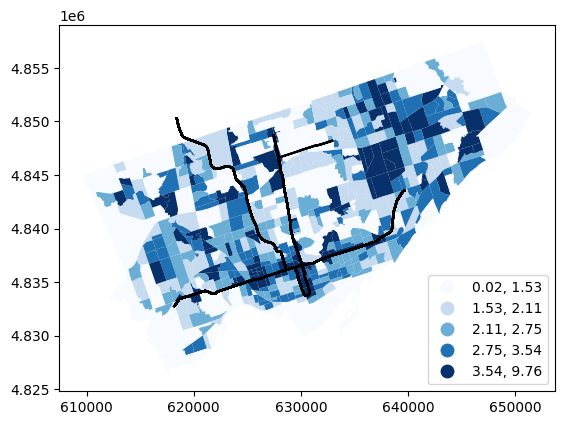

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
subway_2025 = subway_2025.to_crs(toronto_ct.crs)

toronto_ct.plot(column = '30_2025', ax=ax, cmap = 'Blues', scheme = 'quantiles', legend = True, legend_kwds={'loc': 'lower right'})
subway_2025.plot(ax=ax, color = 'black')


In [13]:
iso_15_2015 = gpd.read_file('isochrones/DGUID_ISO_15min_2015.shp')
iso_15_2025 = gpd.read_file('isochrones/DGUID_ISO_15min_2025.shp')

iso_15_2015['15_2015'] = iso_15_2015.geometry.area * 100 / study_area
iso_15_2025['15_2025'] = iso_15_2025.geometry.area * 100 / study_area

iso_15_2015_df = iso_15_2015[['DGUID', '15_2015']]
iso_15_2025_df = iso_15_2025[['DGUID', '15_2025']]

toronto_ct = toronto_ct.merge(iso_15_2015_df, on = 'DGUID', how = 'right')
toronto_ct = toronto_ct.merge(iso_15_2025_df, how = 'right', on = 'DGUID')



In [16]:
toronto_ct['15_change'] = toronto_ct['15_2025'] - toronto_ct['15_2015']
toronto_ct['30_change'] = toronto_ct['30_2025'] - toronto_ct['30_2015']


In [18]:
toronto_ct['15_increase'] = toronto_ct.apply(lambda x: x['15_change'] > 0, axis=1)
toronto_ct['30_increase'] = toronto_ct.apply(lambda x: x['30_change'] > 0, axis=1)

In [20]:
toronto_ct_skimmed = toronto_ct[['DGUID', 'geometry', '30_2015', '30_2025', '15_2015', '15_2025', '15_increase', '30_increase', '15_change', '30_change', 'Location']]

In [21]:
toronto_ct_skimmed.to_file('isochrones_change_final.shp')

C:\Users\saman\AppData\Local\Temp\ipykernel_34516\3355841030.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  toronto_ct_skimmed.to_file('isochrones_change_final.shp')
C:\Users\saman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: '15_increase' to '15_increas'
  ogr_write(
C:\Users\saman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: '30_increase' to '30_increas'
  ogr_write(
